# 02과 이동통신 고객 이탈 예측(데모)


## 00.환경 준비와 데이터 로딩

### 01.라이브러리 불러오기

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### 02.데이터 업로드

In [8]:
# mobile data
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/mobile_cust_churn.csv"
mobile = pd.read_csv(path)
mobile.head()

,id,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,1,0,31953,0,6,313378,161,0,4,unsat,little,no,STAY
1,2,1,36147,0,13,800586,244,0,6,unsat,little,considering,STAY
2,3,1,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,STAY
3,4,0,120070,38,33,788235,780,3,2,unsat,very_high,considering,LEAVE
4,5,1,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,STAY


## 10.데이터 이해

### 11. x --> y

## 20.데이터 준비

### 21. x, y로 나누기

In [6]:
# train set과 holdout(test set) 두 df로 나눕니다.
target = 'CHURN'
x = mobile.drop(target, axis=1)
y = mobile.loc[:, target]

### 22.변수 정리
불필요한 변수 제거

In [9]:
x.drop('id', axis = 1, inplace = True)

### 23.NA 처리

### 24.Dummy Variable

In [10]:
# 가변수화 대상 변수 목록을 만듭니다.
col_cat = ['REPORTED_SATISFACTION', 'REPORTED_USAGE_LEVEL', 'CONSIDERING_CHANGE_OF_PLAN' ]

In [11]:
# 범주형(명목형) 변수를 가변수로 만들고 붙여봅시다.
for v in col_cat :
    dummies = pd.get_dummies(x[v], prefix=v)
    x = pd.concat([x, dummies], axis=1)
    x.drop(v, axis = 1, inplace=True)

x.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION_avg,REPORTED_SATISFACTION_sat,...,REPORTED_USAGE_LEVEL_avg,REPORTED_USAGE_LEVEL_high,REPORTED_USAGE_LEVEL_little,REPORTED_USAGE_LEVEL_very_high,REPORTED_USAGE_LEVEL_very_little,CONSIDERING_CHANGE_OF_PLAN_actively_looking_into_it,CONSIDERING_CHANGE_OF_PLAN_considering,CONSIDERING_CHANGE_OF_PLAN_never_thought,CONSIDERING_CHANGE_OF_PLAN_no,CONSIDERING_CHANGE_OF_PLAN_perhaps
0,0,31953,0,6,313378,161,0,4,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,36147,0,13,800586,244,0,6,0,0,...,0,0,1,0,0,0,1,0,0,0
2,1,27273,230,0,305049,201,16,15,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0,120070,38,33,788235,780,3,2,0,0,...,0,0,0,1,0,0,1,0,0,0
4,1,29215,208,85,224784,241,21,1,0,0,...,0,0,1,0,0,0,0,1,0,0


### 25.Scaling




### 26.Data Split

In [32]:
train_x, val_x, train_y, val_y = train_test_split(x, y, test_size=0.3, random_state=11)

In [33]:
print(train_x.shape)
print(val_x.shape)

(14000, 23)
(6000, 23)


## 30. 모델링


### 31. 함수 불러오기

In [39]:
# 패키지와 함수를 불러옵시다.
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *

### 32. 모델 선언하기

In [48]:
# 모델 선언하기. 
model = DecisionTreeClassifier(max_depth=4)

### 33. 모델 만들기(학습하기)

In [49]:
# 학습하기
model.fit(train_x, train_y)

DecisionTreeClassifier(max_depth=4)

### 34. 예측하기

In [50]:
# 예측하기
pred = model.predict(val_x)

### 35. 평가하기

In [51]:
# 평가하기 : classification_report
print(classification_report(val_y, pred))

              precision    recall  f1-score   support

       LEAVE       0.68      0.79      0.73      3041
        STAY       0.74      0.62      0.68      2959

    accuracy                           0.70      6000
   macro avg       0.71      0.70      0.70      6000
weighted avg       0.71      0.70      0.70      6000



### 36. 모델 시각화

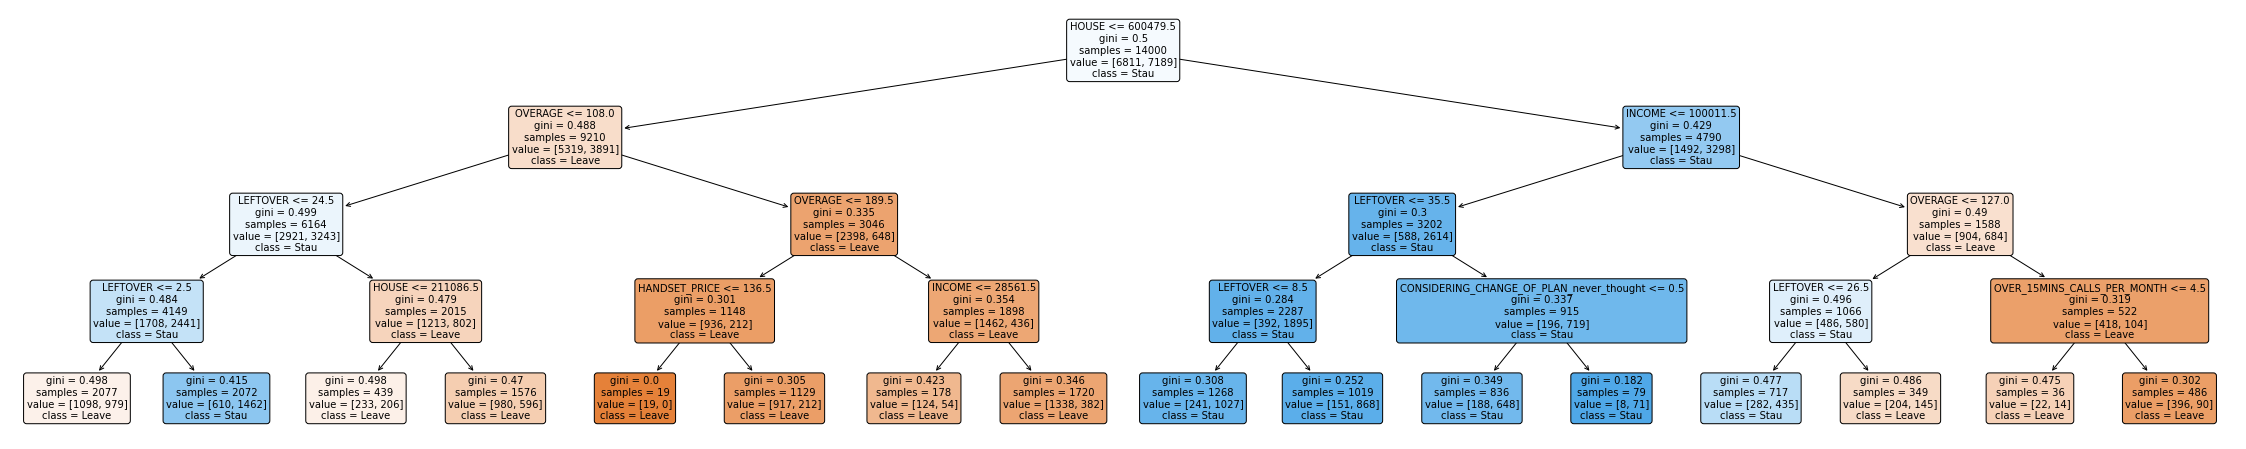

In [59]:
from sklearn.tree import plot_tree

plt.figure(figsize = (40,8)) #사이즈 조정
plot_tree(model 
          , feature_names = x.columns # feature 이름
          , class_names = ['Leave','Stau']  # Target 값들
          , rounded = True, filled = True, fontsize = 10) # 몇가지 설정옵션 
plt.show()